In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os 
if 'notebooks' in os.getcwd():
    os.chdir('..')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from src.metrics.custom_metric_QRT_22_6BhdSkn import metric, \
    transform_submission_to_ypred
from src.features.pre_processing import train_test_split, reshape_X, \
    read_train_test_df
from src.metrics.benchmark import get_benchmark
from src.linalg.gram_schmidt import gram_schmidt
from src.GD.gradient import gradient
from src.GD.gradient_descent import gradient_descent
from src.metrics.objective_function import objective

# Feature selection
We will perform gradient descent in the objective function and analyse the test performance

In [4]:
X, y = read_train_test_df()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [36]:
X_train.index.has_duplicates, X_test.index.has_duplicates

(False, False)

## Train epoch

In [37]:
X_train_reshape = reshape_X(X_train)
X_test_reshape = reshape_X(X_test)

c:\Users\User\Desktop\code\qrt-2022-challenge\src\features\pre_processing.py:22: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_reshape = pd.concat([


In [46]:
A = np.eye(250, 10)
# A[9,9] = 0
# A[20:250, 9] = 1/np.sqrt(230)

In [47]:
beta= np.random.random(10)

In [48]:
k = 0
N_ITER = 1000
beta_new = np.ones(10)
condition = True
convergence = []
while k<N_ITER and condition:
    beta_new = gradient_descent(
        A, 
        beta,
        X_train, 
        y_train,
        objective, 
        X_train_reshape, 
        alpha=1
    )

    f_k = objective(
        A, 
        beta, 
        X_train, 
        y_train, 
        X_train_reshape
    )

    if k<=2 : 
        condition = True
    else:
        condition = abs(convergence[-1] - convergence[-2]) > 1e-8
        print(convergence[-1], abs(convergence[-1] - convergence[-2]), k)
    beta = beta_new
    k+=1
    
    convergence.append(f_k)

0.01146187076051883 0.000479871083653478 3
0.011934512239790097 0.00047264147927126784 4
0.01239996475328678 0.00046545251349668255 5
0.012858276526786906 0.00045831177350012624 6
0.013309502599607814 0.00045122607282090804 7
0.013753704029458606 0.0004442014298507921 8
0.01419094708440364 0.00043724305494503325 9
0.014621302414681162 0.00043035533027752267 10
0.015044844248071588 0.0004235418333904256 11
0.015461649609681338 0.0004168053616097501 12
0.01587179759613745 0.00041014798645611084 13
0.016275368726478386 0.00040357113034093783 14
0.01667244438237388 0.00039707565589549437 15
0.017063106357875085 0.0003906619755012046 16
0.01744743652706343 0.00038433016918834606 17
0.017825516640504784 0.0003780801134413529 18
0.01819742825195136 0.0003719116114465765 19
0.018563252773825555 0.00036582452187419387 20
0.01892307165873492 0.00035981888490936587 21
0.01927696669252377 0.0003538950337888501 22
0.01962502038725011 0.0003480536947263399 23
0.019967316455931444 0.00034229606868133

Text(0.5, 0, 'iter')

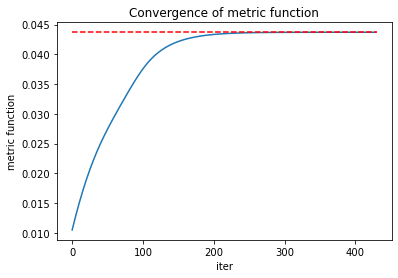

In [49]:
plt.plot(convergence,)
plt.hlines(
    convergence[-1], 
    xmin = 0,
    xmax =len(convergence),
    colors = 'r',
    linestyles= 'dashed', 
)
plt.title("Convergence of metric function")
plt.ylabel("metric function")
plt.xlabel("iter")

In [50]:
beta

array([ 0.47158655, -0.1872425 , -0.88820057, -0.59833917,  0.63472154,
        0.27273674, -0.00172509, -0.270001  ,  0.55731042,  0.81206293])

In [58]:
X_test

date,0,1,2,3,4,5,6,7,8,9,...,744,745,746,747,748,749,750,751,752,753
stocksID,,,,,,,,,,,,,,,,,,,,,
2,-0.008404,-0.013629,-0.006044,-0.003425,-0.009522,-0.001353,-0.000637,0.007640,0.001600,0.007416,...,-0.006245,-0.001329,0.005230,0.003510,0.006022,-0.000343,0.001757,0.004972,0.004916,-0.007338
7,-0.015313,-0.014736,-0.000887,-0.007216,-0.002479,0.009570,0.018751,0.010083,0.001444,-0.003139,...,0.009826,0.002853,-0.007369,0.000135,-0.004778,0.000125,-0.009989,0.000157,-0.007284,0.008943
10,-0.001147,-0.016695,0.007454,-0.005303,0.003181,0.016117,0.005573,-0.000710,0.001647,-0.009164,...,0.012913,0.000073,-0.002950,0.004077,0.002649,-0.002735,-0.008617,-0.005271,-0.005225,-0.000245
14,-0.012168,0.019964,-0.003221,-0.013039,0.041556,-0.009895,-0.006820,-0.005912,-0.010077,0.003479,...,-0.003926,0.000022,-0.007619,-0.001711,0.001331,-0.002182,-0.001727,-0.002852,0.000167,-0.003783
18,-0.021609,0.021863,0.009436,-0.001607,-0.001718,0.008877,-0.018181,0.005210,-0.008042,0.016395,...,-0.011116,-0.013582,0.012978,0.005472,-0.000301,0.000365,-0.000835,0.004915,0.013675,-0.011257
20,-0.011668,-0.014626,0.000756,-0.012222,0.003966,0.014226,0.007152,0.002714,0.003428,-0.001084,...,0.015495,-0.007044,-0.004738,0.001362,0.003746,-0.001418,-0.007988,-0.002677,-0.005976,0.000694
22,-0.017202,0.002534,-0.019244,-0.018584,0.022352,-0.015219,-0.007309,-0.004595,0.003249,-0.005000,...,-0.002111,0.002365,0.004065,0.000402,-0.012365,0.005003,-0.002723,0.002291,-0.000768,-0.004658
23,-0.004914,-0.016879,0.002263,-0.010774,0.005534,0.014897,0.003505,0.002448,0.000753,0.010557,...,0.013936,0.002261,-0.004053,0.006849,0.003042,-0.004781,-0.010360,-0.001809,-0.005447,0.005624
28,0.003453,-0.017335,-0.009334,-0.002691,0.009791,-0.005076,-0.020276,-0.000871,-0.031337,-0.033629,...,-0.008372,-0.005591,0.005417,0.006132,0.006081,-0.009299,0.003432,-0.004154,0.000719,-0.002768


In [55]:
y_test

date,250,251,252,253,254,255,256,257,258,259,...,744,745,746,747,748,749,750,751,752,753
stocksID,,,,,,,,,,,,,,,,,,,,,
2,-0.003446,-0.001272,0.005824,-0.006994,-0.005512,-0.003652,0.003997,-0.005139,-0.004550,0.001228,...,-0.006245,-0.001329,0.005230,0.003510,0.006022,-0.000343,0.001757,0.004972,0.004916,-0.007338
7,0.001901,0.000966,-0.005722,0.007912,-0.009105,-0.000039,0.009376,-0.007260,-0.006115,-0.001948,...,0.009826,0.002853,-0.007369,0.000135,-0.004778,0.000125,-0.009989,0.000157,-0.007284,0.008943
10,-0.004314,-0.000850,-0.006096,0.008375,-0.010244,0.002842,0.003688,-0.007032,-0.003355,-0.000092,...,0.012913,0.000073,-0.002950,0.004077,0.002649,-0.002735,-0.008617,-0.005271,-0.005225,-0.000245
14,0.001033,0.004449,0.002389,0.004642,0.000284,0.006934,0.024407,0.000714,-0.005964,0.000249,...,-0.003926,0.000022,-0.007619,-0.001711,0.001331,-0.002182,-0.001727,-0.002852,0.000167,-0.003783
18,0.007596,-0.001990,-0.000251,-0.011902,0.010289,0.002863,0.004479,0.007431,0.009827,-0.015380,...,-0.011116,-0.013582,0.012978,0.005472,-0.000301,0.000365,-0.000835,0.004915,0.013675,-0.011257
20,0.003258,-0.000232,-0.001476,0.009941,-0.003435,-0.002801,0.015049,-0.005409,0.003133,-0.000506,...,0.015495,-0.007044,-0.004738,0.001362,0.003746,-0.001418,-0.007988,-0.002677,-0.005976,0.000694
22,0.000049,0.000984,-0.003236,0.001346,0.000693,0.008435,-0.003756,0.003923,-0.012435,-0.005611,...,-0.002111,0.002365,0.004065,0.000402,-0.012365,0.005003,-0.002723,0.002291,-0.000768,-0.004658
23,-0.004200,-0.002684,0.002702,0.005478,-0.008838,-0.000890,0.004720,-0.000385,-0.000761,-0.001374,...,0.013936,0.002261,-0.004053,0.006849,0.003042,-0.004781,-0.010360,-0.001809,-0.005447,0.005624
28,-0.007760,-0.012009,-0.011406,0.001259,-0.022348,0.009864,-0.011799,0.023438,-0.007435,0.001236,...,-0.008372,-0.005591,0.005417,0.006132,0.006081,-0.009299,0.003432,-0.004154,0.000719,-0.002768


In [53]:
objective(A, beta, X_test, y_test, X_test_reshape)

-0.006230588230035169

In [ ]:
metric()

In [62]:
model = LinearRegression()

In [63]:
features = X_train_reshape @ A 

In [67]:
features.shape, y_train.T.stack().shape

((17640, 10), (17640,))

In [68]:
model.fit(features, y_train.T.stack())

LinearRegression()

In [71]:
objective(A, model.coef_, X_train, y_train)

c:\Users\User\Desktop\code\qrt-2022-challenge\src\metrics\custom_metric_QRT_22_6BhdSkn.py:33: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_test_reshape = pd.concat([x_test.shift(i+1).stack(dropna=False) for i in range(250)], 1).dropna()


-0.008532942099136999